## Student Performance Indicator


#### Life cycle of a Machine learning Project

- Understanding the problem statement
- Data collection
- Performing data checks
- Exploratory data analysis
- Data pre-processing
- Model training
- Choosing the best model

### 1) Problem statement
This project is used to understand how the student's performance (test scores) is affected by factors such as 'gender', 'ethnicity', 'parental level of education', 'lunch', and the 'test preparation course'. This understanding will then be used to derive predictive models for student performance estimation.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [6]:
df = pd.read_csv('data/stud.csv');

#### Show Top 5 Records

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [7]:
df.shape

(1000, 8)

### 2.2 Dataset information

- **gender**: sex of students -> (Male or female)
- **race/ethnicity**: ethnicity of students -> (Groups A, B, C, D, and E)
- **parental level of education**: parents' final education ->(bachelor's degree, some college, master's degree, associate's degree, high school)
- **lunch**: having lunch before test (standard or free/reduced) 
- **test preparation course**: complete or not complete before test
- **math score**
- **reading score**
- **writing score**

### 3. Data Checks to perform

- Check **Missing values**
- Check **Duplicates**
- Check **Data Types**
- Check the **number of unique values of each column**
- Check **statistics** of data set
- Check various **categories** present in the different **categorical columns**

### 3.1 Check Missing values

In [8]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [9]:
df.duplicated().sum()

np.int64(0)

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [10]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [11]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [12]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score of 0 for math; the min score for writing = 10 and for reading = 17, are higher

### 3.6 Exploring Data

In [13]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
# When you use end=" ", you are changing the default behavior to add a space (" ") instead of a newline
print("Categories in 'gender' variable:\n", end="\t")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:\n", end="\t")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:\n", end="\t")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:\n", end="\t")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:\n", end="\t")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:
	['female' 'male']
Categories in 'race_ethnicity' variable:
	['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable:
	["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:
	['standard' 'free/reduced']
Categories in 'test preparation course' variable:
	['none' 'completed']


In [15]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [16]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### 3.7 Adding columns for "Total Score" and "Average"

In [7]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [18]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [19]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Density Estimation (KDE)

#### 4.1.1 Histogram & KDE

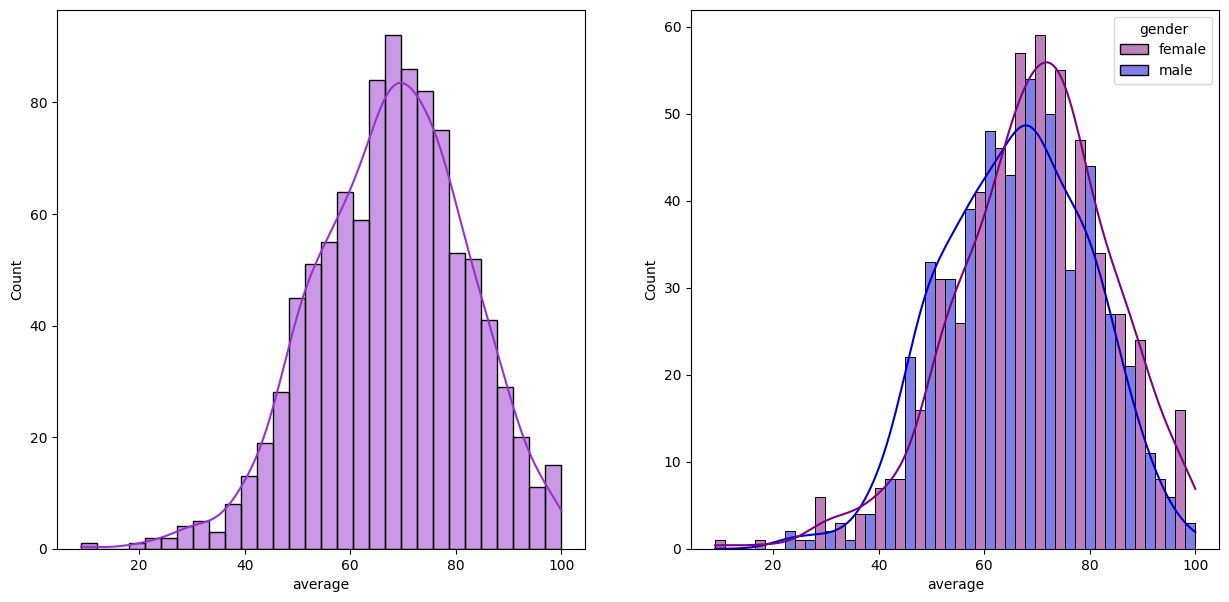

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='darkorchid')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender', palette={'male': 'mediumblue', 'female': 'purple'}, multiple='dodge')
plt.show()

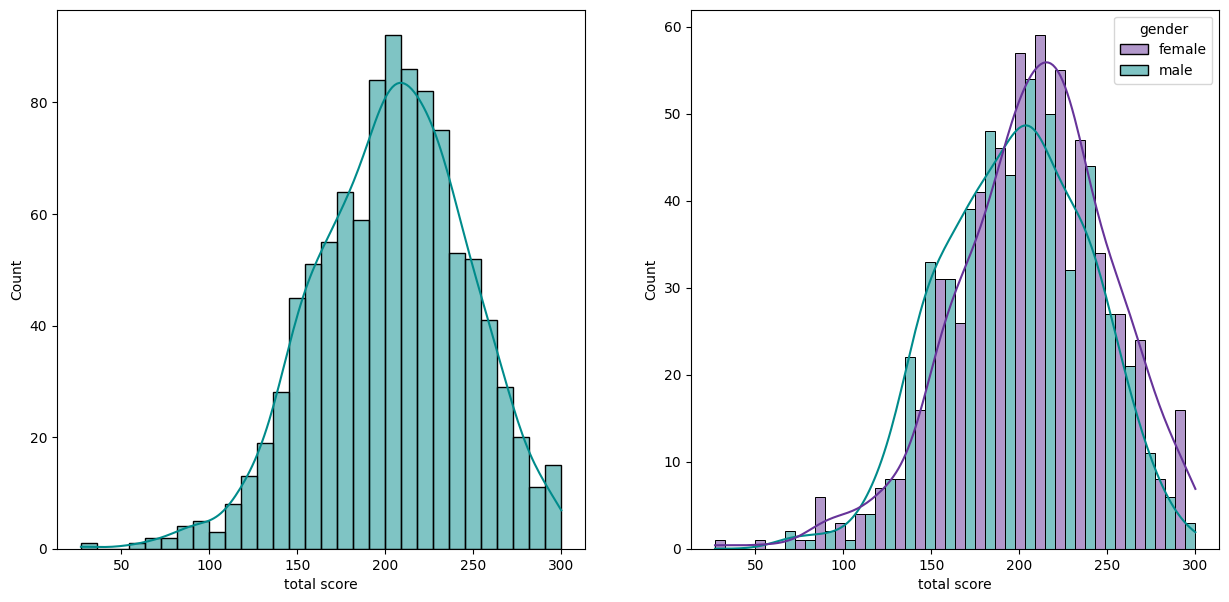

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='darkcyan')
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, hue='gender', palette={'male': 'darkcyan', 'female': 'rebeccapurple'}, multiple='dodge')
plt.show()

#####  Insights
- Female students in the sample perform better than male students in terms of average scores, which is indicated by a higher mean 'average' score.

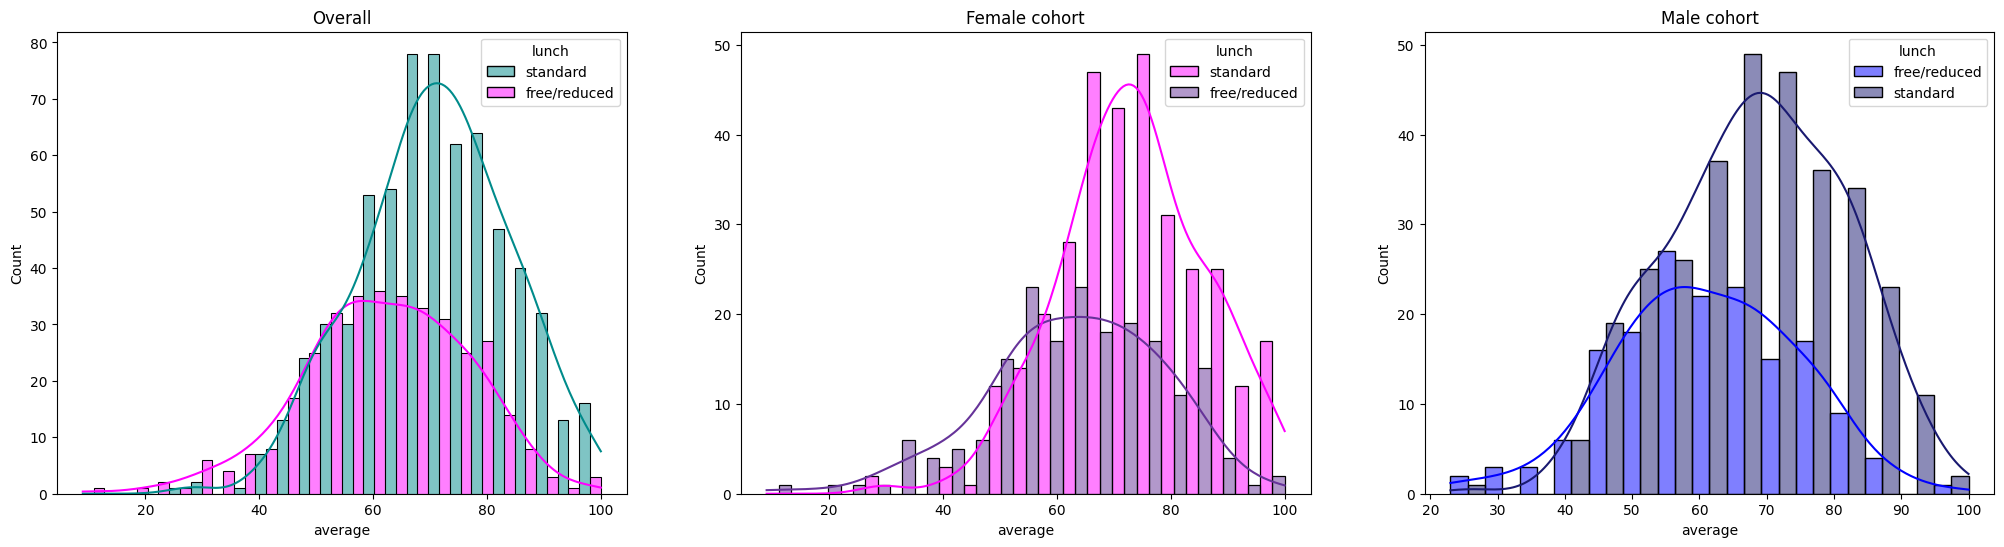

In [43]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
plt.title('Overall')
sns.histplot(data=df,x='average',kde=True,hue='lunch', palette={'standard': 'darkcyan', 'free/reduced': 'magenta'}, multiple='dodge')
plt.subplot(132)
plt.title('Female cohort')
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch', palette={'standard': 'fuchsia', 'free/reduced': 'rebeccapurple'}, multiple='dodge')
plt.subplot(133)
plt.title('Male cohort')
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch', palette={'standard': 'midnightblue', 'free/reduced': 'b'}, multiple='dodge')
plt.show()

#####  Insights
- Standard lunch helps perform well in exams be it a male or a female.

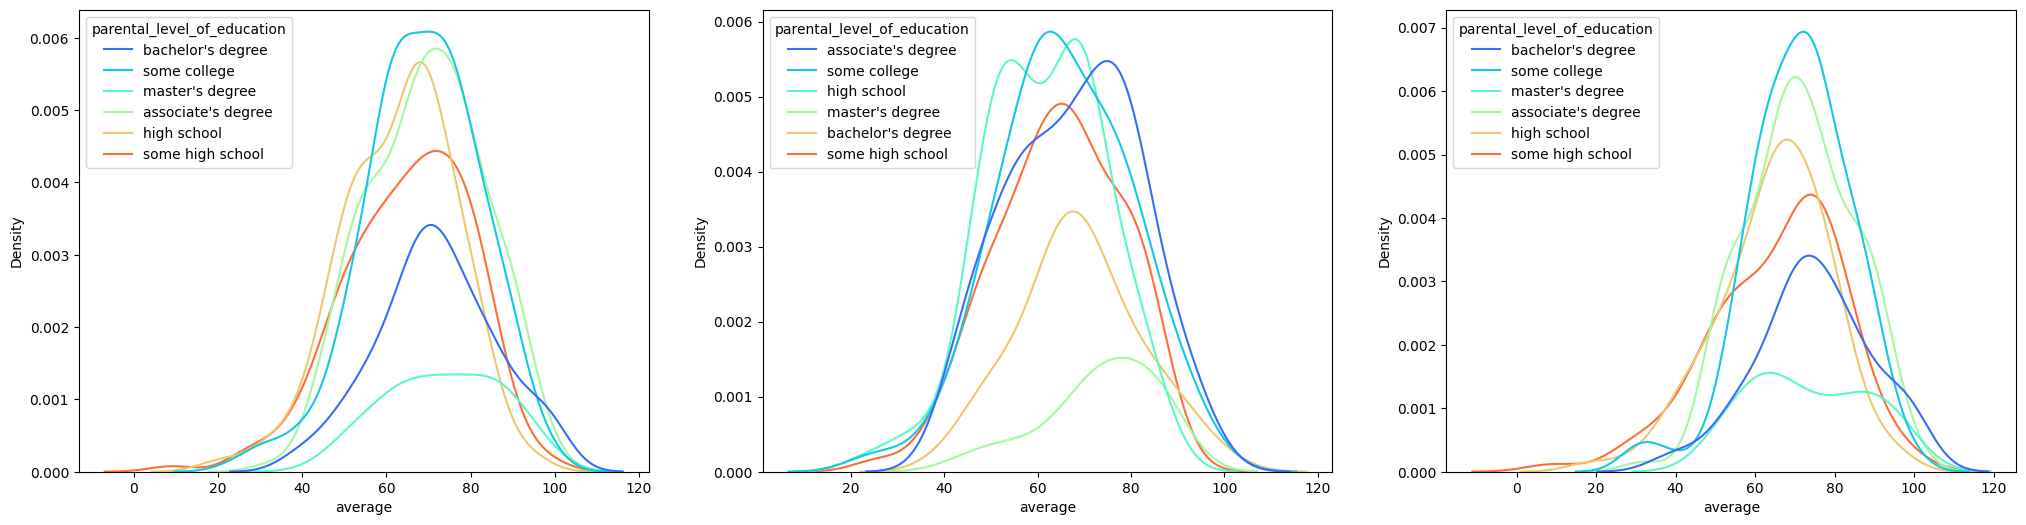

In [52]:
plt.subplots(1,3,figsize=(25,6))
custom_palette = sns.color_palette("rainbow", n_colors=len(df['parental_level_of_education'].unique()))

plt.subplot(131)
# ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education', palette=custom_palette)
ax =sns.kdeplot(data=df,x='average',hue='parental_level_of_education', palette=custom_palette)
plt.subplot(132)
# ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education', palette=custom_palette)
ax =sns.kdeplot(data=df[df.gender=='male'],x='average',hue='parental_level_of_education', palette=custom_palette)
plt.subplot(133)
# ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education', palette=custom_palette)
ax =sns.kdeplot(data=df[df.gender=='female'],x='average',hue='parental_level_of_education', palette=custom_palette)
plt.show()

#####  Insights
- In general, parents' education does not significantly affect the students' performance in the exams.
- The 2nd plot shows that male students tend to perform well in exam if the parents' education is that of an associate's degree or a master's degree 
- The 3rd plot shows that there is little effect parents' education on a female student's performance.

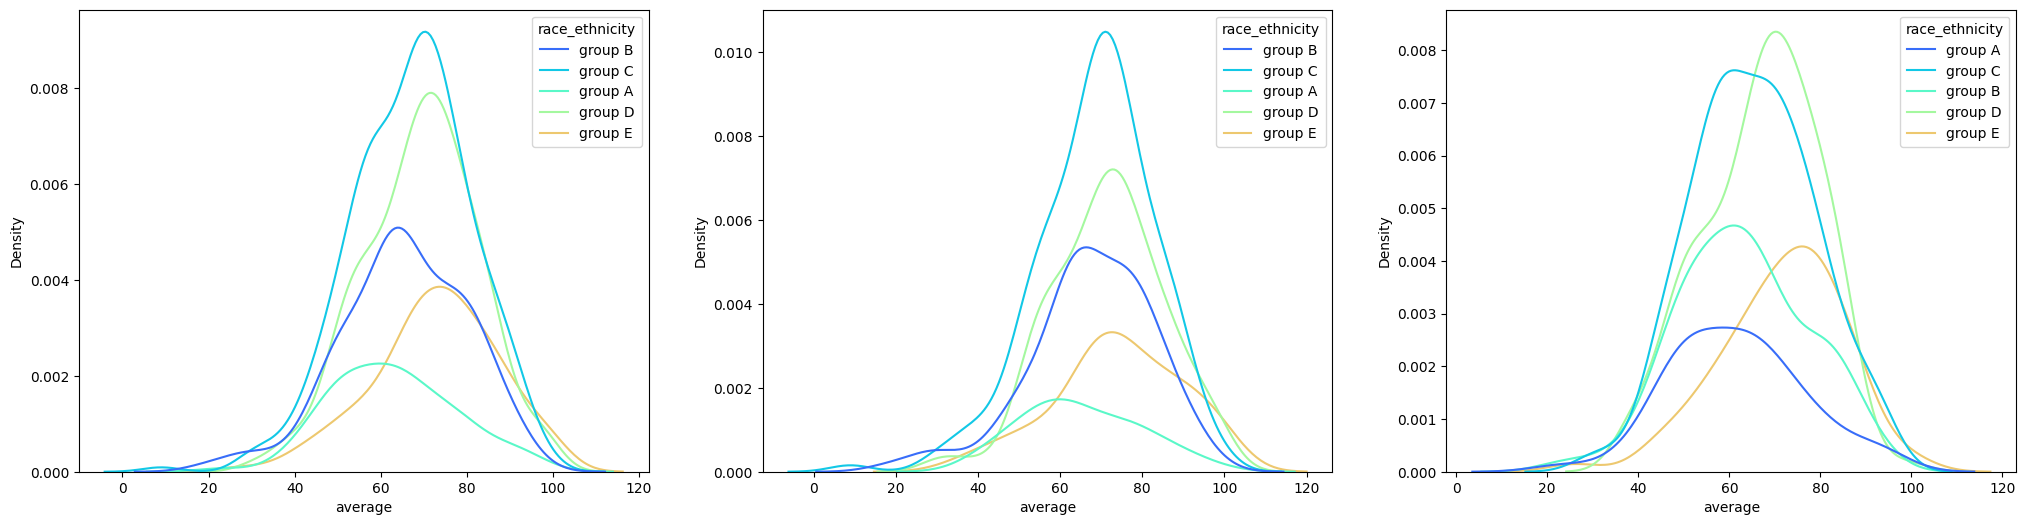

In [53]:
plt.subplots(1,3,figsize=(25,6))
custom_palette = sns.color_palette("rainbow", n_colors=len(df['parental_level_of_education'].unique()))
plt.subplot(131)
# ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity', palette=custom_palette)
ax =sns.kdeplot(data = df, x='average', hue='race_ethnicity', palette=custom_palette)
plt.subplot(132)
# ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity', palette=custom_palette)
ax =sns.kdeplot(data = df[df.gender=='female'], x='average', hue='race_ethnicity', palette=custom_palette)
plt.subplot(133)
# ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity', palette=custom_palette)
ax =sns.kdeplot(data = df[df.gender=='male'], x='average', hue='race_ethnicity', palette=custom_palette)
plt.show()

#####  Insights
- Students of group A and group B tend to perform poorly in the exams.
- Students of group A and group B tend to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximumum score of students in all three subjects

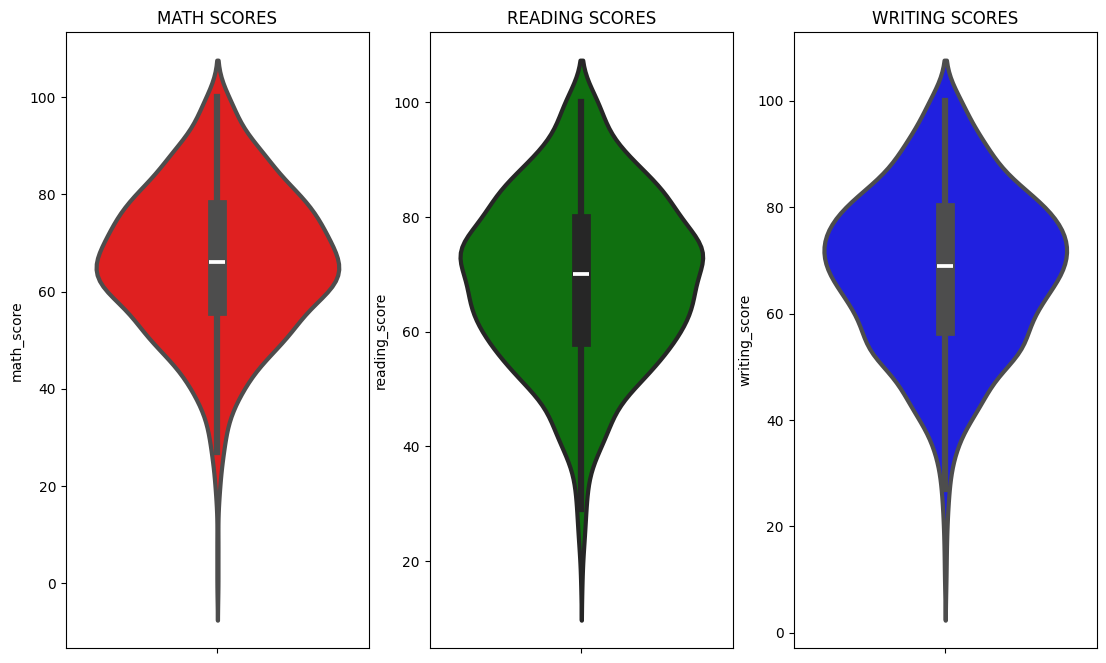

In [28]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.3 Multivariate analysis using pieplot

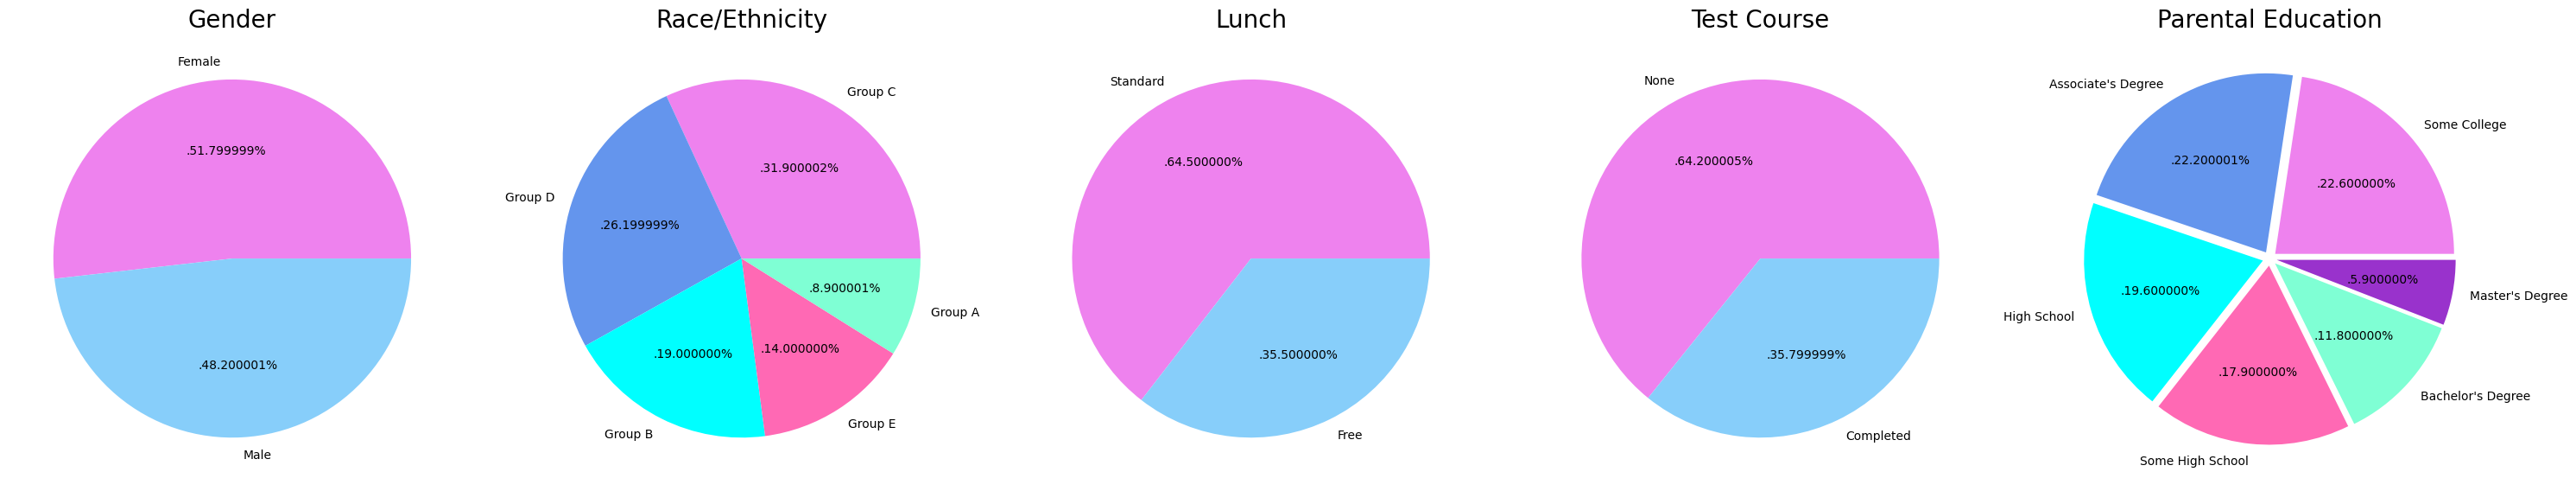

In [30]:
plt.rcParams['figure.figsize'] = (30, 12) #Runtime configuration parameters

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['violet','lightskyblue']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['violet','cornflowerblue', 'aqua', 'hotpink','aquamarine']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['violet','lightskyblue']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['violet','lightskyblue']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['violet','cornflowerblue', 'aqua', 'hotpink','aquamarine','darkorchid']

plt.pie(size, explode = [0.04,0.04,0.04,0.04,0.04,0.04], colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout() 
plt.grid()

plt.show()

#####  Insights
- The number of Male and Female students is almost equal
- The number students are greatest in Group C
- The number of students who have had standard lunches are greater
- The number of students who have not enrolled in any test preparation course is greater
- The number of students whose parental education is "Some College" is the greatest followed closely by "Associate's Degree"

### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is the distribution of Gender?
- Does gender have any impact on the student's performance?

#### UNIVARIATE ANALYSIS (How is the distribution of Gender?)

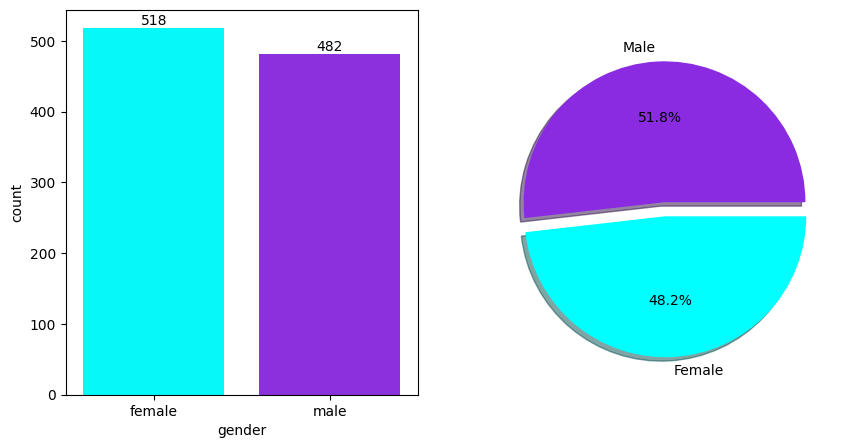

In [34]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x=df['gender'],data=df,palette =['cyan', 'blueviolet'],ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['blueviolet', 'cyan'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS (Does the gender have any impact on the student's performance?) 

In [33]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [39]:
#gender_group = df.groupby('gender').mean()
#gender_group

# Include both numeric columns and the 'gender' column for grouping
numeric_cols_with_gender = df.select_dtypes(include='number').copy()
numeric_cols_with_gender['gender'] = df['gender']

# Now, group by 'gender' and calculate mean
gender_group = numeric_cols_with_gender.groupby('gender').mean()

print(gender_group)


        math_score  reading_score  writing_score  total score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483


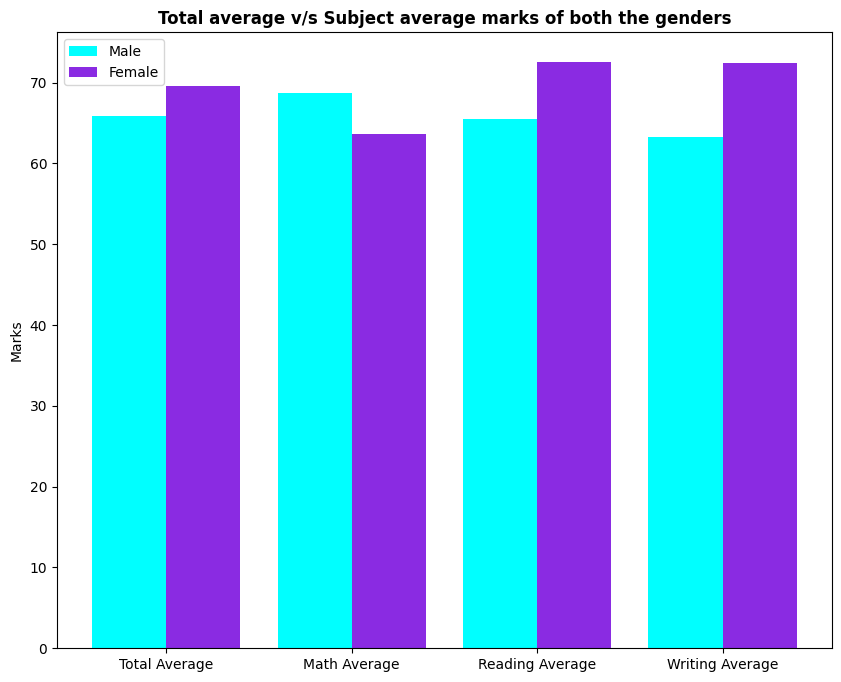

In [45]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average', 'Reading Average','Writing Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0], gender_group['reading_score'][0], gender_group['writing_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1], gender_group['reading_score'][1], gender_group['writing_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male', color =['cyan'])
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female', color =['blueviolet'])
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Subject average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()




#### Insights 
- Female students have a better overall score than men.
- Male students have only scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is the group wise distribution?
- Does the Race/Ehnicity have any impact on the student's performance?

#### UNIVARIATE ANALYSIS (How is the group wise distribution?)

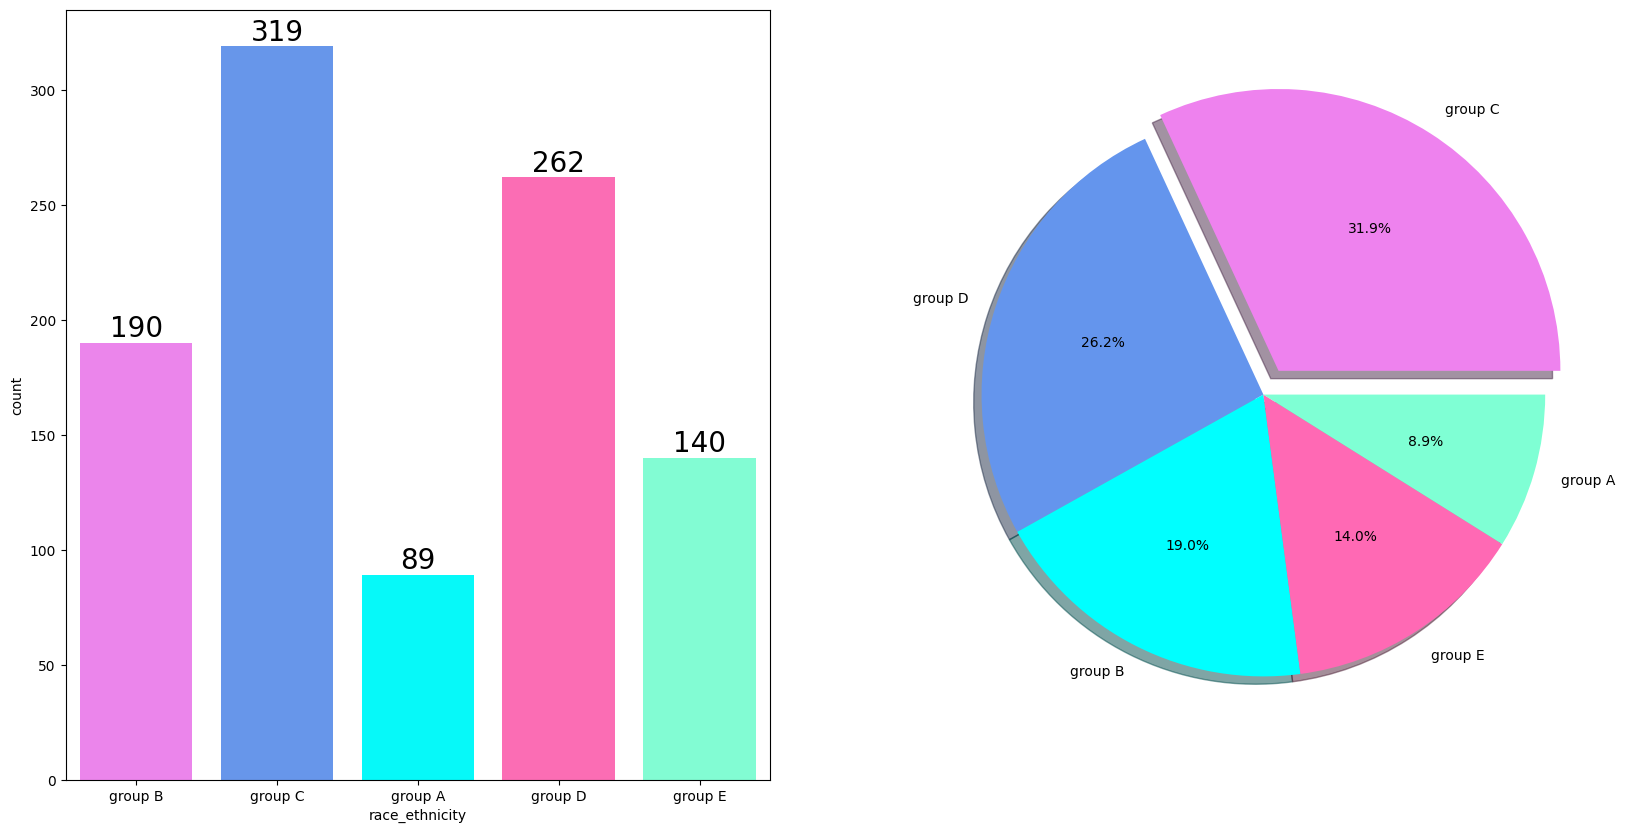

In [48]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'], data=df, palette = ['violet','cornflowerblue', 'aqua', 'hotpink','aquamarine'],ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(), colors = ['violet','cornflowerblue', 'aqua', 'hotpink','aquamarine'], labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights 
- Group C and group D dominant in the group, while group A and E are under represented.
- Lowest number of students belong to group A.

#### BIVARIATE ANALYSIS (Does the Race/Ehnicity have any impact on the student's performance?)

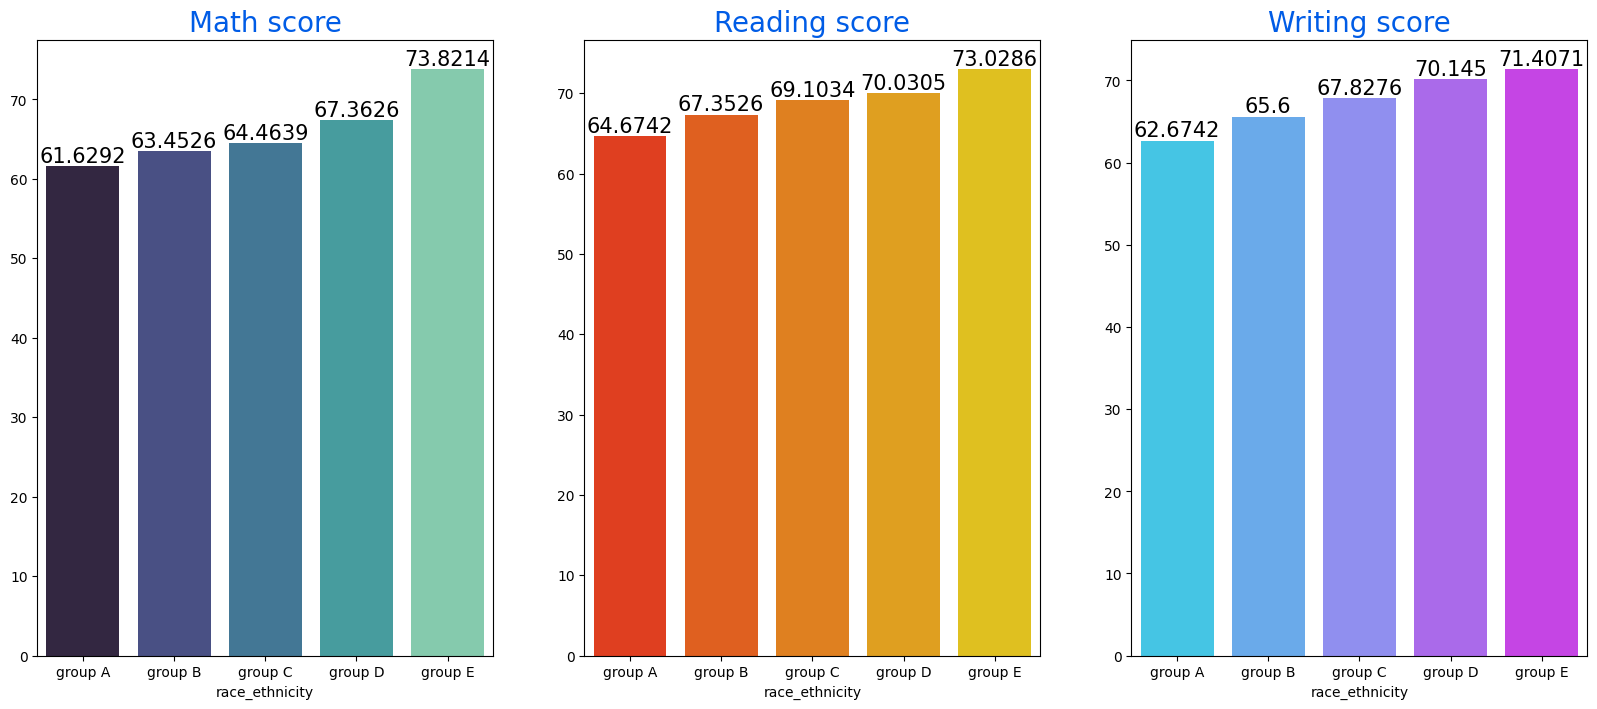

In [51]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'autumn',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'cool',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights 
- Group E students have scored the highest marks in all subjects. 
- Group A students have scored the lowest marks in all subjects.

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is the distribution of the educational background of students' parents?
- Does the parental education of the parent have any impact on the student's performance?

#### UNIVARIATE ANALYSIS 
##### (What is the distribution of the educational background of students' parents?)

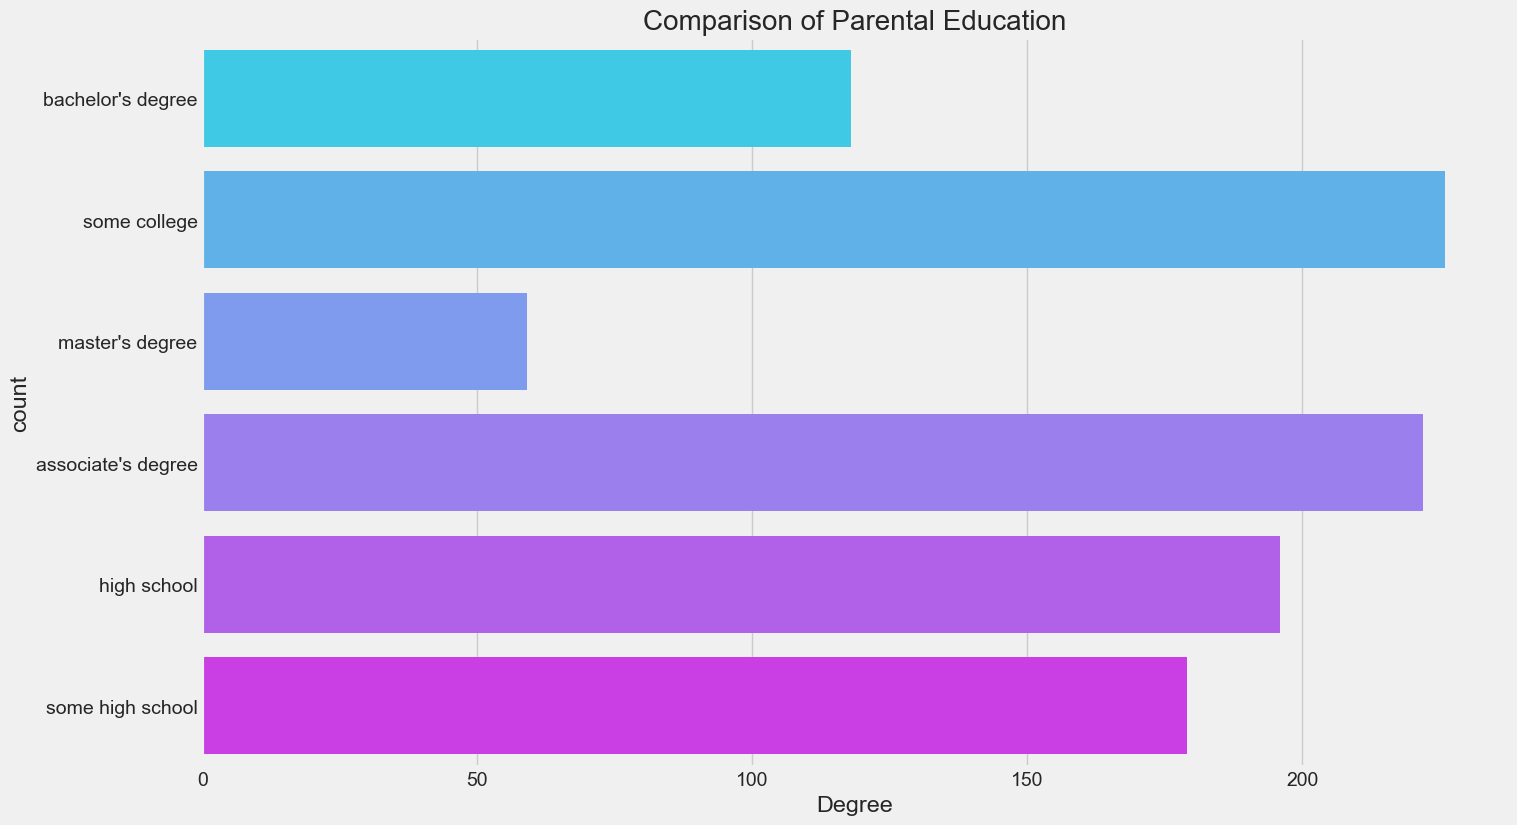

In [38]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'cool')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights 
- Number of parents with master's degree are under-represented.

#### BIVARIATE ANALYSIS 
##### (Does the parental education of the parent have any impact on the student's performance?)

In [10]:
numeric_cols_with_gender.drop('total score', axis=1)

,math_score,reading_score,writing_score,average,parental_level_of_education
0,72,72,74,72.666667,bachelor's degree
1,69,90,88,82.333333,some college
2,90,95,93,92.666667,master's degree
3,47,57,44,49.333333,associate's degree
4,76,78,75,76.333333,some college
...,...,...,...,...,...
995,88,99,95,94.000000,master's degree
996,62,55,55,57.333333,high school
997,59,71,65,65.000000,high school
998,68,78,77,74.333333,some college


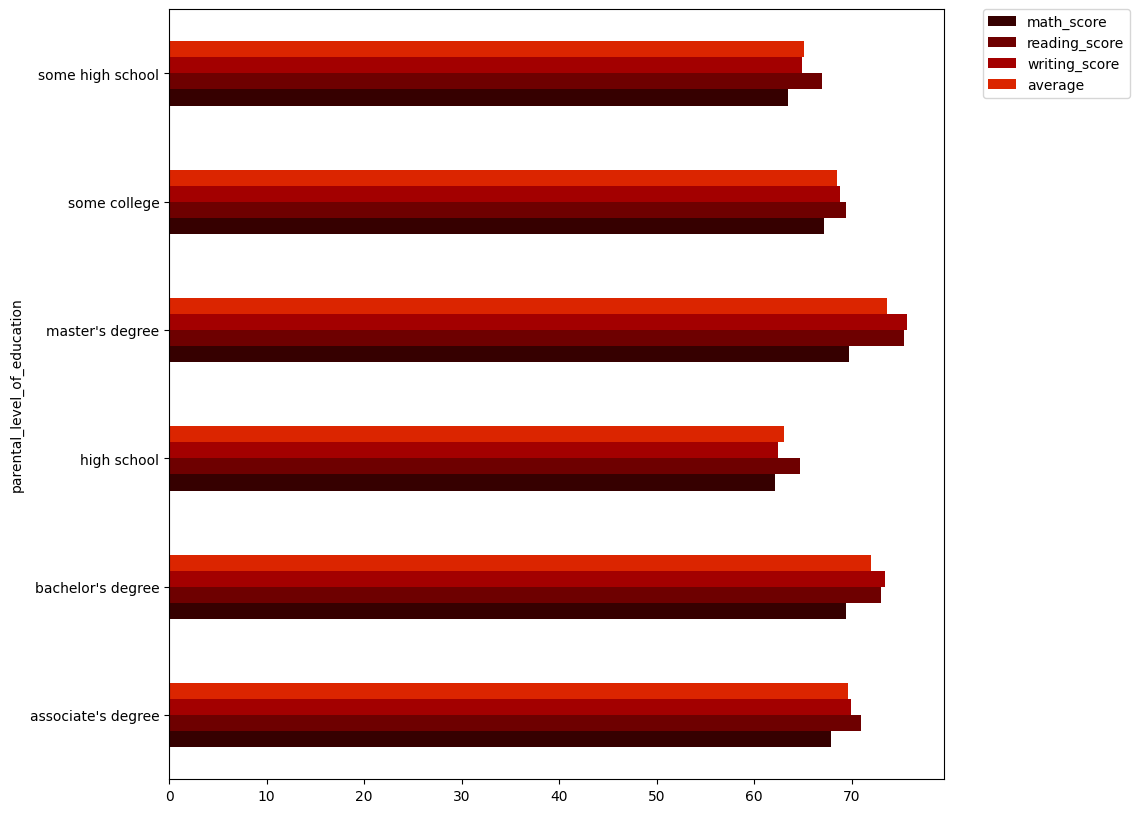

In [13]:
#df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.show()

# Include both numeric columns and the 'gender' column for grouping
numeric_cols_with_gender = df.select_dtypes(include='number').copy().drop('total score', axis=1)
numeric_cols_with_gender['parental_level_of_education'] = df['parental_level_of_education']
# Now, group by 'gender' and calculate mean
sns.set_palette("gist_heat")
gender_group = numeric_cols_with_gender.groupby('parental_level_of_education').agg('mean').plot(kind='barh', figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights 
- The score of student whose parents have master's and bachelor's level education are the highest and with high school education are the lowest.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is the most common amoung students?
- What is the effect of the lunch's type on the test results?


#### UNIVARIATE ANALYSIS (Which type of lunch is most common amoung students?)

In [75]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


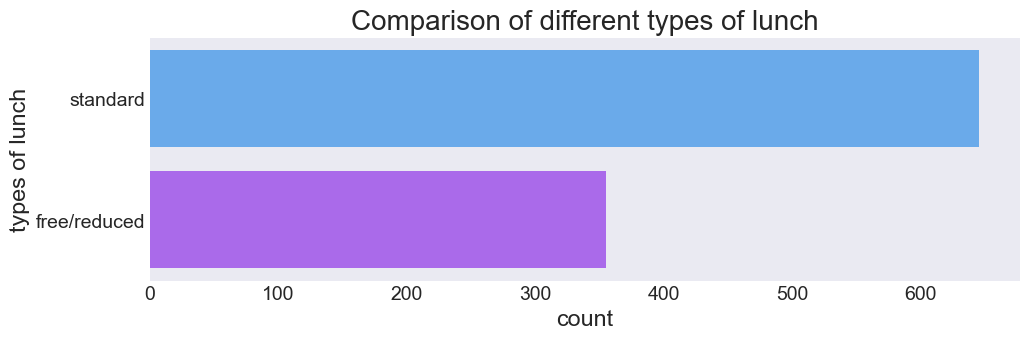

In [50]:
plt.rcParams['figure.figsize'] = (10, 3)
plt.style.use('seaborn-v0_8-dark')
sns.countplot(df['lunch'], palette = 'cool')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('count')
plt.ylabel('types of lunch')
plt.show()

#### Insights 
- The group of students being served standard lunches is under-represented as compared to the free lunch group.

#### BIVARIATE ANALYSIS (Does the lunch type have any impact on the student's performance?)

<Figure size 1000x800 with 0 Axes>

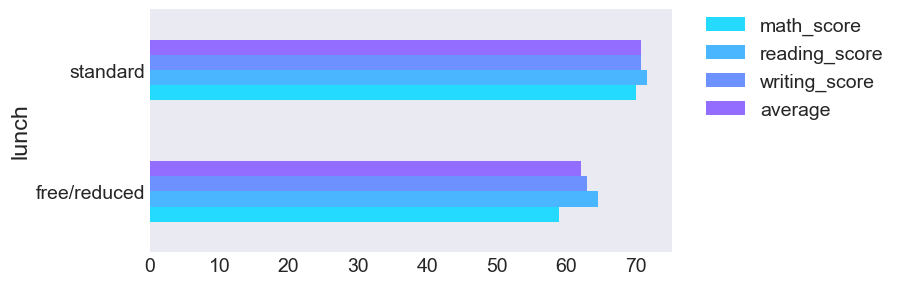

In [48]:
plt.rcParams['figure.figsize'] = (6, 3)
plt.figure(figsize=(10, 8))
# Include both numeric columns and the 'lunch' column for grouping
numeric_cols_with_lunch = df.select_dtypes(include='number').copy().drop('total score', axis=1)
numeric_cols_with_lunch['lunch'] = df['lunch']
# Now, group by 'lunch' and calculate mean
sns.set_palette("cool")
gender_group = numeric_cols_with_lunch.groupby('lunch').agg('mean').plot(kind='barh')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Is the test preparation common among the students?
- Does the test prepration course have any impact on the student's performance?

#### UNIVARIATE ANALYSIS (Is the test preparation common among the students?)

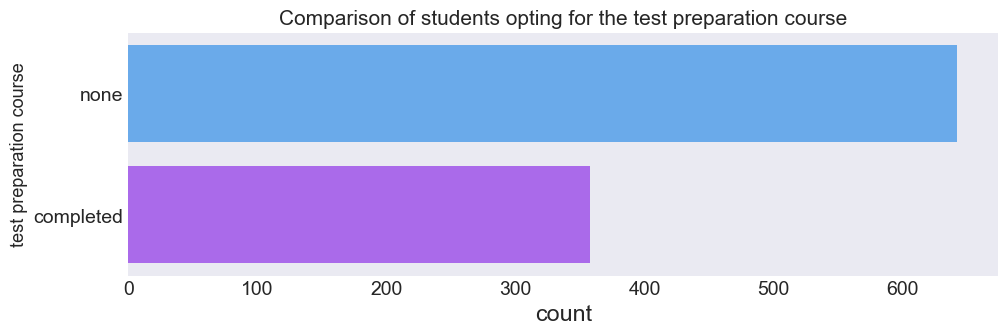

In [88]:
plt.rcParams['figure.figsize'] = (10, 3)
plt.style.use('seaborn-v0_8-dark')
sns.countplot(df['test_preparation_course'], palette = 'cool')
plt.title('Comparison of students opting for the test preparation course', fontweight = 30, fontsize = 15)
plt.xlabel('count')
plt.ylabel('test preparation course', fontsize = 13)
plt.show()

#### BIVARIATE ANALYSIS (Does the test prepration course have any impact on the student's performance?)

Text(0, 0.5, 'Writing score')

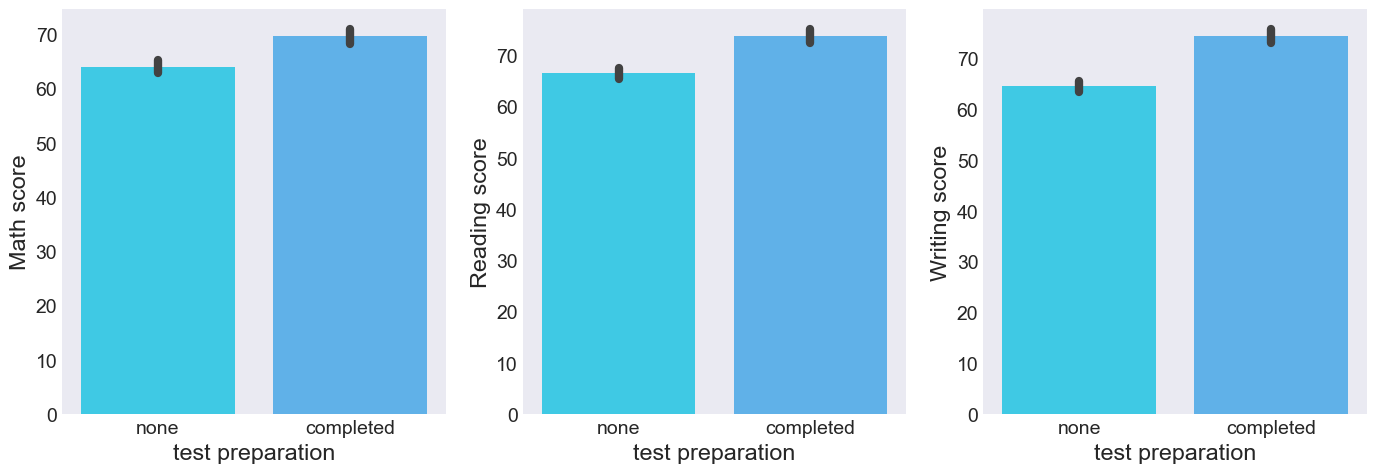

In [126]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot (x=df['test_preparation_course'], y=df['math_score'], hue=df['test_preparation_course'])
plt.xlabel('test preparation')
plt.ylabel('Math score')
plt.subplot(1,3,2)
sns.barplot (x=df['test_preparation_course'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.xlabel('test preparation')
plt.ylabel('Reading score')
plt.subplot(1,3,3)
sns.barplot (x=df['test_preparation_course'], y=df['writing_score'], hue=df['test_preparation_course'])
plt.xlabel('test preparation')
plt.ylabel('Writing score')

#### Insights  
- Students who have completed the Test Prepration Course have higher scores in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

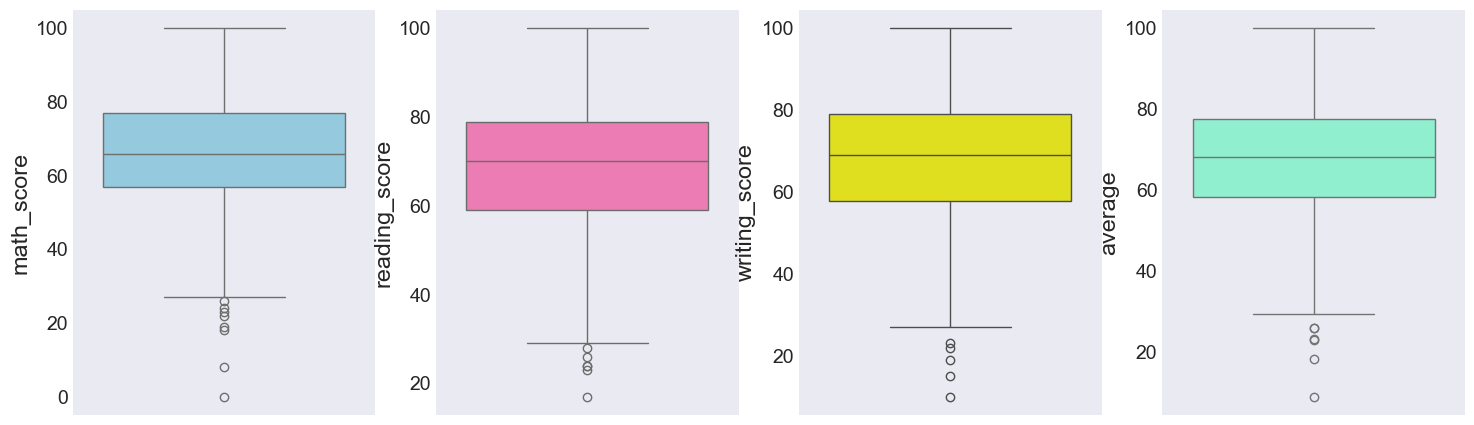

In [108]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='aquamarine')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

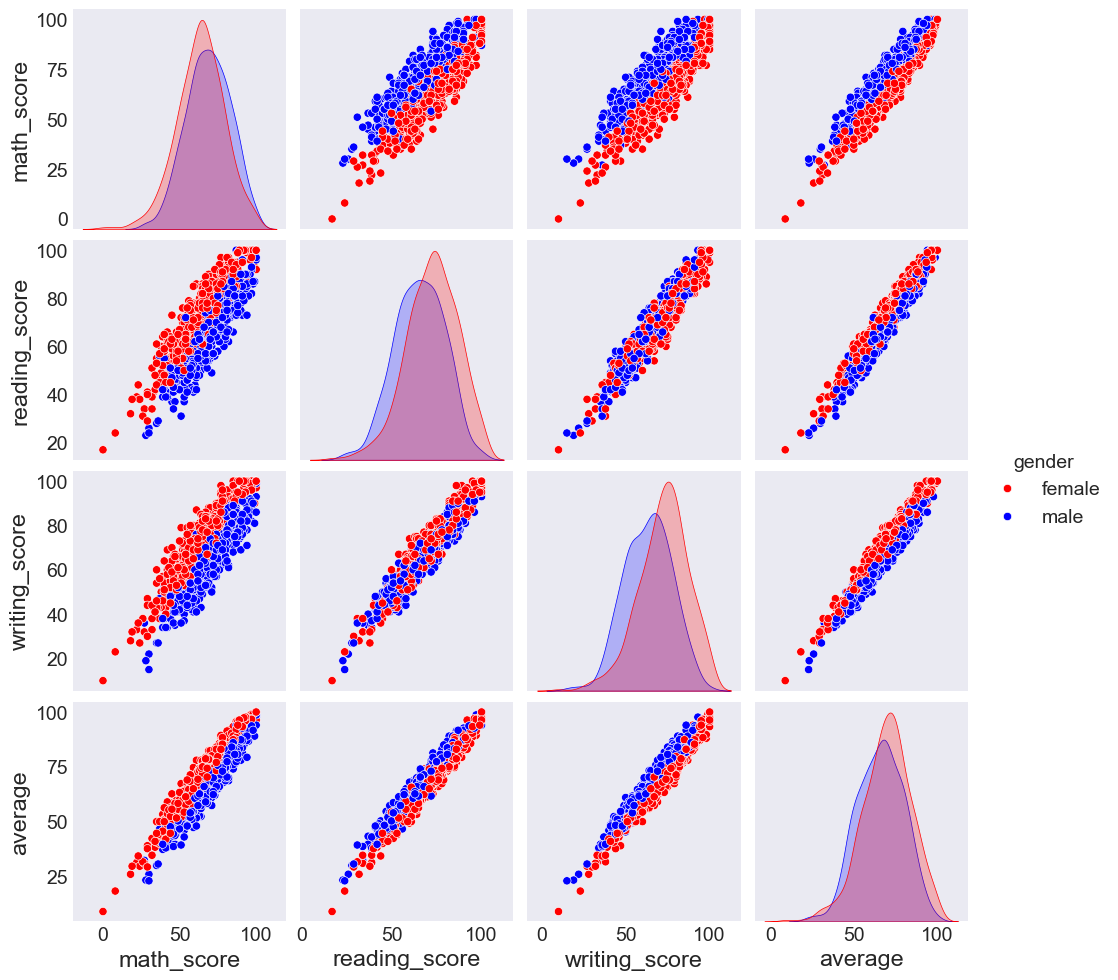

In [118]:
custom_palette = {'male': 'blue', 'female': 'red'}
sns.pairplot(df.drop('total score', axis=1),hue = 'gender', palette = custom_palette)
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is weakly related with test preparation course
- Finishing preparation course is benefitial.